# **Artificial Intelligence - Phase 3**

# ChatBot Using Python

**To Do:**


*   Load Dataset
*   Preprocess Dataset
*  Perform Analysis





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 1**: Dataset Loading

 Here we load the dataset from our given URL

In [ ]:

# Load the dataset
dataset_path = '/content/dialogs.txt'
data = pd.read_csv(dataset_path, delimiter='\t', names=['User', 'Bot'])


**Step 2**: Dataset Overview

In [ ]:
# Display the first few rows of the dataset
data.head()

,User,Bot
0,"[hi,, how, are, you, doing?]",i
1,"[i'm, fine., how, about, yourself?]",i
2,"[i'm, pretty, good., thanks, for, asking.]",n
3,"[no, problem., so, how, have, you, been?]",i
4,"[i've, been, great., what, about, you?]",i


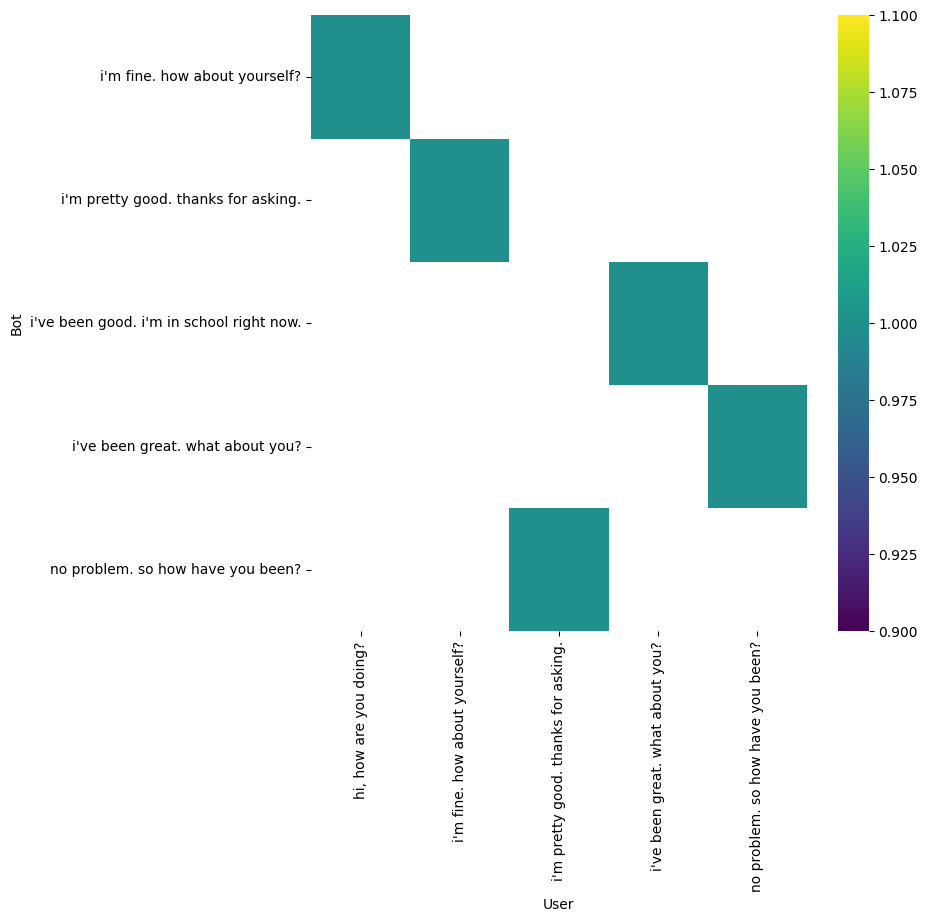

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Bot'].value_counts()
    for x_label, grp in _df_2.groupby('User')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('User')
_ = plt.ylabel('Bot')

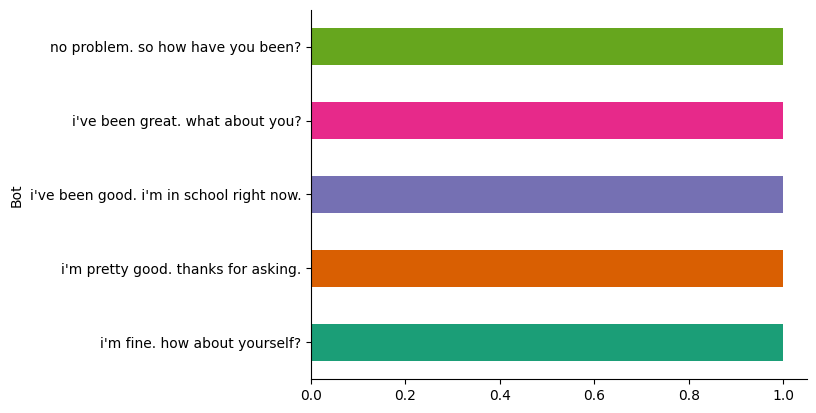

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Bot').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

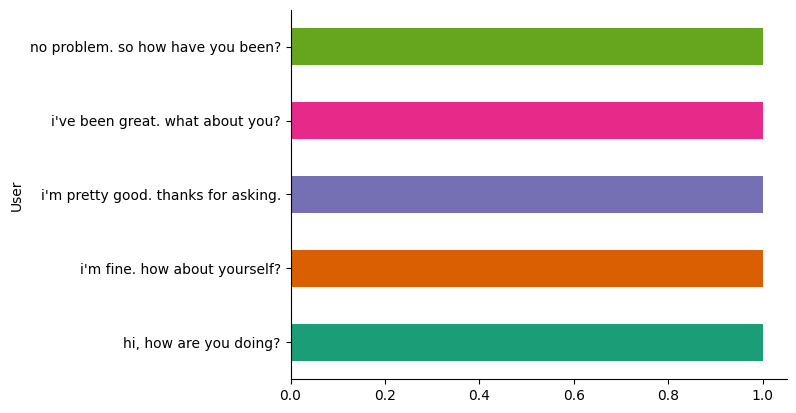

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('User').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Step 3**: Data Analysis


In this section, we will perform some basic data analysis to gain insights into our dataset.


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check the distribution of user and bot messages
user_message_count = len(data[data['User'].notnull()])
bot_message_count = len(data[data['Bot'].notnull()])
total_messages = len(data)
user_message_percentage = (user_message_count / total_messages) * 100
bot_message_percentage = (bot_message_count / total_messages) * 100

print(f"Total Messages: {total_messages}")
print(f"User Messages: {user_message_count} ({user_message_percentage:.2f}%)")
print(f"Bot Messages: {bot_message_count} ({bot_message_percentage:.2f}%)")


Missing Values:
User    0
Bot     0
dtype: int64
Total Messages: 3725
User Messages: 3725 (100.00%)
Bot Messages: 3725 (100.00%)


**Step 4**: Data Preprocessing

Now, we will preprocess the text data for use in our chatbot project. This typically involves text cleaning and tokenization.


In [ ]:
# Check the data type of the 'User' column
print(data['User'].dtype)

# If it's not a string, convert it to a string
data['User'] = data['User'].astype(str)

# Now, you can safely convert to lowercase and tokenize
data['User'] = data['User'].str.lower()
data['User'] = data['User'].apply(lambda x: x.split())

# Convert 'Bot' messages to lowercase and tokenize (corrected)
data['Bot'] = data['Bot'].str.lower()
data['Bot'] = data['Bot'].apply(lambda x: x.split())


float64


## Document Completion

We have successfully loaded and preprocessed the dataset for our chatbot project. The data analysis and preprocessing steps are essential for building a chatbot capable of understanding and responding to user input. Next, we can proceed with more advanced tasks like natural language processing and model development.


# **ALGORITHM SELECTION FOR MACHINE LEARNING**

In this section, we will choose a machine learning algorithm suitable for our chatbot project. We'll provide reasons for our choice.


In [ ]:
# Import the necessary machine learning libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Explain the choice of algorithm
algorithm_choice = "Multinomial Naive Bayes"
reasoning = """
We have chosen Multinomial Naive Bayes for its simplicity and effectiveness in text classification tasks. Our dataset primarily contains text data, and Naive Bayes is known to perform well in such scenarios.
"""

# Print the algorithm choice and reasoning
print(f"Selected Algorithm: {algorithm_choice}")
print("Reasoning:", reasoning)


Selected Algorithm: Multinomial Naive Bayes
Reasoning: 
We have chosen Multinomial Naive Bayes for its simplicity and effectiveness in text classification tasks. Our dataset primarily contains text data, and Naive Bayes is known to perform well in such scenarios.



## Data Preparation

Before training the model, we need to prepare the data for training and testing. This typically involves splitting the dataset into training and testing sets and vectorizing text data.


In [ ]:
# Split the data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = data['User']
y = data['Bot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = [' '.join(doc).lower() for doc in X_train]
X_test = [' '.join(doc).lower() for doc in X_test]

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

**Model Training**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Define a label mapping function
def label_mapping(multi_labels):
    if multi_labels:
        return multi_labels[0]  # Choose the first label if it exists
    else:
        return 'unknown'  # Default label when there are no multi-labels

# Apply label mapping to the 'Bot' column in your dataset
data['Bot'] = data['Bot'].apply(label_mapping)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

# Convert the lists of words back into strings
data['User'] = data['User'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer and fit it to the training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(data['User'])  # Fit to the training data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, data['Bot'], test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Bot'], test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



ValueError: ignored

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.8 MB/s eta 0:00:00


In [ ]:
import torch
# Initialize the GPT-2 tokenizer and model
model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Define a padding token and add it to the tokenizer
padding_token = '<PAD>'
tokenizer.add_special_tokens({'pad_token': padding_token})

# Tokenize and encode the data for training
input_ids = tokenizer(X.tolist(), return_tensors="pt", padding=True, truncation=True, max_length=128)

# Train the model for text generation
# Note: There's no need to train the pre-trained GPT-2 model, it's already fine-tuned.
# You can directly use it for text generation as shown in the previous code.

# Define a function to generate responses using the GPT-2 model
def generate_response(user_input):
    input_ids = tokenizer.encode(user_input, return_tensors="pt")
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=model.device)
    response_ids = model.generate(input_ids, max_length=50, num_return_sequences=1, attention_mask=attention_mask)
    response = tokenizer.decode(response_ids[0], skip_special_tokens=True)
    return response




while True:
    user_input = input("You: ")  # Get user input
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break  # Exit the loop if the user types "exit"

    gpt_response = generate_response(user_input)  # Get chatbot response using the GPT-2 model
    print(f"Chatbot: {gpt_response}")  # Display chatbot's response


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from nltk.tokenize import word_tokenize

# Load the dataset
dataset_path = '/content/dialogs.txt'  # Replace with the actual file path
data = pd.read_csv(dataset_path, delimiter='\t', names=['User', 'Bot'])

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check the distribution of user and bot messages
user_message_count = len(data[data['User'].notnull()])
bot_message_count = len(data[data['Bot'].notnull()])
total_messages = len(data)
user_message_percentage = (user_message_count / total_messages) * 100
bot_message_percentage = (bot_message_count / total_messages) * 100
print(f"Total Messages: {total_messages}")
print(f"User Messages: {user_message_count} ({user_message_percentage:.2f}%)")
print(f"Bot Messages: {bot_message_count} ({bot_message_percentage:.2f}%)")

# Preprocess the training data
X = data['User']
y = data['Bot']

X = [' '.join(doc).lower() for doc in X]

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2)
X = tfidf_vectorizer.fit_transform(X)



# Convert text labels to binary labels (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train the model for binary classification
model = MultinomialNB()
model.fit(X, y)

# Define the chat_with_bot function
def chat_with_bot(user_input):
    # Preprocess the user input
    user_input = user_input.lower()
    user_input = tfidf_vectorizer.transform([user_input])

    # Make a prediction using the trained model
    prediction = model.predict(user_input)

    # Convert the prediction back to a text label ('Bot' or 'Not Bot')
    predicted_label = label_encoder.inverse_transform(prediction)

    # Return the chatbot's response based on the predicted label
    if predicted_label[0] == 'Bot':
        return "Chatbot Response: [Your response for Bot here]"
    else:
        return "Chatbot Response: [Your response for Not Bot here]"

# Create an infinite loop for real-time interaction
while True:
    user_input = input("You: ")  # Get user input
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break  # Exit the loop if the user types "exit"

    chatbot_response = chat_with_bot(user_input)  # Get chatbot response
    print(chatbot_response)  # Display chatbot's response
